In [128]:
%reset -f
import torch
from torchvision import transforms
from matplotlib import pyplot as plt
from models import TCNmodel
import numpy as np
from random import randrange
from koila import LazyTensor, lazy

train_sample = torch.load('tensor.pt')
train_sample=train_sample.transpose(1,2)
#print(train_data.shape)
preprocess = transforms.Compose([
    #transforms.Resize([41,360,640]),
    #transforms.CenterCrop(299),
    #transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
train_sample = preprocess(train_sample)
print(train_sample.shape)
# adjust sample size to see the optimal gpu speed
train_sample =train_sample[:,0:39,:,:,:]
print(train_sample.shape)
train_sample = torch.reshape(train_sample,[3,13,3,360,640])
print(train_sample.shape)


# print(len(train_sample))
# X,N,C,W,H = train_sample.shape
# print(X)
# for i, data in enumerate(train_sample):
#     print(data.shape)


torch.Size([1, 41, 3, 360, 640])
torch.Size([1, 39, 3, 360, 640])
torch.Size([3, 13, 3, 360, 640])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


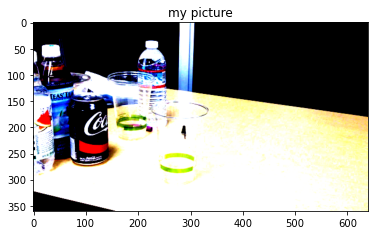

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


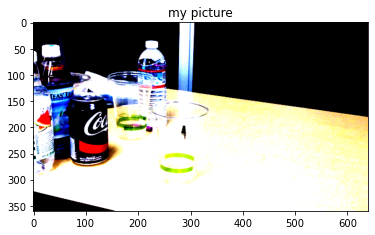

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


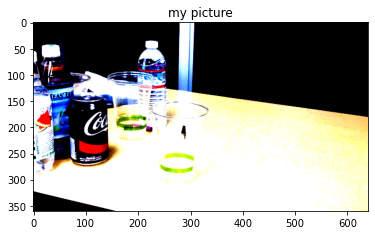

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


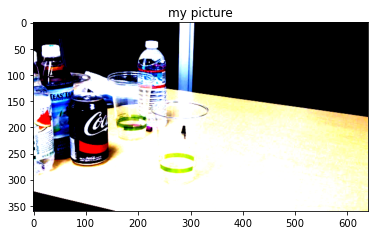

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


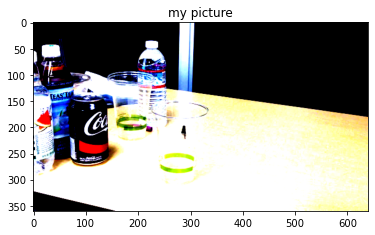

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


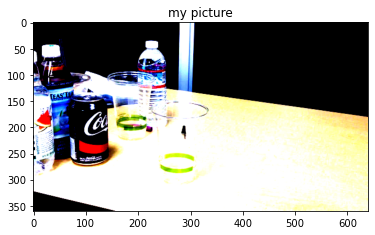

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


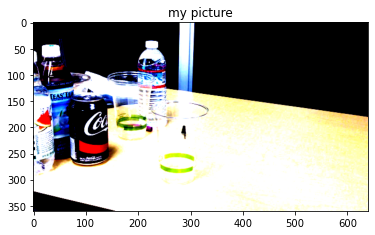

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


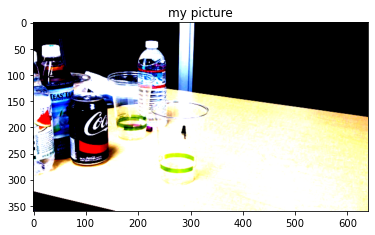

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


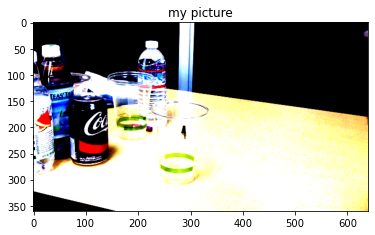

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


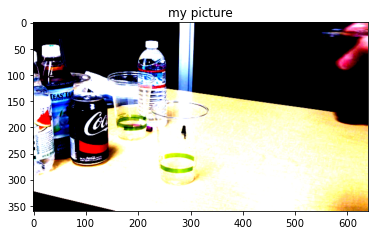

In [129]:
# show that images are in sequence
for i in range(10):
    plt.imshow(train_sample[0,i,:,:,:].transpose(0,2).transpose(0,1))
    plt.title('my picture')
    plt.show()

# for i,data in enumerate(train_sample):
#     print(i)
#     print(data.shape)
# 7/40

In [117]:
# model=TCNmodel()


In [118]:
# with torch.no_grad():
#     output = model(train_data[0,:,:,:])
# # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# print(output.shape)


In [119]:
#control+"/""
# from random import randrange
# import numpy as np

# anchor = output;
# print(anchor.shape)
# alpha = 0.2 # 7/41 ~0.2s
# # Total time dt-> frame number
# idx = np.arange(41)
# posindex = np.zeros(41)
# for i in range(41):
#     p = randrange(-1,1)
#     if p ==-1:
#         posindex[i]=-1
#     else:
#         posindex[i]=1

# posindex[0]=1
# posindex[-1]=-1
# posindx = idx+posindex
# print(posindex)
# pos_sample = output[posindex,:]

# negindex = np.zeros(41)
# for i in range(41):
#     p = randrange(0,41)
#     while p<=i+2 & p>=i-2:
#         p=randrange(0,41)
#        # print(p)
#     negindex[i]=p
# print(negindex)
# neg_sample = output[negindex,:]

# triplet_loss = torch.nn.TripletMarginLoss(margin=0.2, p=2)
# corr=torch.mm(output,output.transpose(0,1))
# loss = triplet_loss(anchor, pos_sample, neg_sample)
# print(loss)
# print(corr)
# print(output)

In [120]:
def train(train_loader, net, optimizer, criterion,device):
    """
    Trains network for one epoch in batches.

    Args:
        train_loader: Data loader for training set.
        net: Neural network model.
        optimizer: Optimizer (e.g. SGD).
        criterion: Loss function (e.g. cross-entropy loss).
    """
  
    avg_loss = 0
    #correct = 0
    total = 0

    # iterate through batches
    for i, data in enumerate(train_loader):
        N,C,W,H = data.shape
        # get the inputs; data is a list of [inputs, labels]
        inputs = data
        inputs= inputs.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        anchor = outputs
        
        idx = np.arange(N)

        # positve
        posindex = np.zeros(N)
        for i in range(N):
            p = randrange(-1,1)
            if p ==-1:
                posindex[i]=-1
            else:
                posindex[i]=1

        posindex[0]=1
        posindex[-1]=-1
        posindx = idx+posindex
        positive = outputs[posindex,:]
        #print('posindex')
        
        # negative
        negindex = np.zeros(N)
        for i in range(N):
            p = randrange(0,N)
            while p<i+2 & p>i-2:
                p=randrange(0,41)
       # print(p)
            negindex[i]=p

        negative = outputs[negindex,:]
        
        
        
        alpha = 0.2
        loss = criterion(anchor,positive,negative)
        loss.backward()
        optimizer.step()

        # keep track of loss and accuracy
        avg_loss += loss
        #print(avg_loss)
    return avg_loss/len(train_loader)

In [127]:

from tqdm import tqdm
epochs = 1000

# Create instance of Network
net = TCNmodel()

# Create loss function and optimizer
criterion = torch.nn.TripletMarginLoss(margin=0.2, p=2)
optimizer = torch.optim.SGD(net.parameters(), lr=5e-1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#device = 'cpu'
net = net.to(device)
# print(device)
for epoch in tqdm(range(epochs)):  # loop over the dataset multiple times
    # Train on data
    train_loss = train(train_sample,net,optimizer,criterion,device)
    #print(train_loss)
    torch.cuda.empty_cache()

    # need test function
    # how to evaluate
    # [1:41]
    # [0 1 2 3 4]
    # [0 2 1 3 4]




Using cache found in C:\Users\Think/.cache\torch\hub\pytorch_vision_v0.10.0
  2%|█▌                                                                              | 19/1000 [00:33<28:58,  1.77s/it]


KeyboardInterrupt: 